In [249]:
from astropy.io import fits, ascii
from astropy.table import Table, Column, hstack
from astropy.time import Time
import numpy as np
import rafias_lib as rl
import pdb
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

## General

In [157]:
telem_table = ascii.read('/data1/tso_analysis/all_tso_cv3/temperatures/cv3_otp821_telem.CSV')
time_list = []
for time in telem_table['Secondary Time']:
    time_list.append(string.replace(string.replace(time, '/', '-'), ' ', 'T'))
Tlist = Time(time_list)
telem_table['JD'] = Tlist.jd
telem_table

Primary Time,Secondary Time,APID,Telemetry Mnemonic,EU Value,Flags,Raw Type,Raw Value,JD
str23,str23,int64,str23,str21,int64,str4,int64,float64
2016/01/11 00:00:00.000,2016/01/10 18:00:57.179,778,INRC_FA_TMC1_SW_HTR_ST,ENABLE,0,CS,1,2457398.25066
2016/01/11 00:00:00.000,2016/01/10 18:00:57.179,778,INRC_FA_TMC2_SW_HTR_ST,ENABLE,0,CS,1,2457398.25066
2016/01/11 00:00:00.000,2016/01/10 18:01:03.227,779,INRC_FB_TMC1_SW_HTR_ST,ENABLE,0,CS,1,2457398.25073
2016/01/11 00:00:00.000,2016/01/10 18:01:03.227,779,INRC_FB_TMC2_SW_HTR_ST,ENABLE,0,CS,1,2457398.25073
2016/01/11 00:00:00.000,2016/01/10 08:21:51.665,-1,IGDP_NRC_FA_TMC2_SWMV_T,9.054495271677895e+01,0,FL32,0,2457397.84851
2016/01/11 00:00:00.000,2016/01/07 20:31:56.977,-1,IGDP_NRC_FB_TMC2_SWMV_T,2.895544870499462e+02,0,FL32,0,2457395.35552
2016/01/11 00:00:00.000,2016/01/10 23:59:42.819,-1,IGDP_NRC_A_T_SWFPAH1,3.736645780735095e+01,5,FL32,0,2457398.4998
2016/01/11 00:00:00.000,2016/01/10 23:59:10.948,-1,IGDP_NRC_B_T_SWFPAH1,3.760912863591025e+01,5,FL32,0,2457398.49943
2016/01/11 00:00:00.000,2016/01/10 23:59:58.639,-1,IGDP_NRC_FA_TMC1_SWMV_T,3.720505137821176e+01,5,FL32,0,2457398.49998


In [259]:
tmnemonic = ['IGDP_NRC_A_T_SWFPAH1', 'IGDP_NRC_FA_TMC1_SWMV_T', 'IGDP_NRC_A_T_OBA_TS1', 'IGDP_NRC_FA_ACE1_SCTEMP',
             'IGDP_NRC_B_T_SWFPAH1', 'IGDP_NRC_FB_TMC1_SWMV_T', 'IGDP_NRC_B_T_OBA_TS1', 'IGDP_NRC_FB_ACE1_SCTEMP']
description = ['A Det Housing Temp', 'A Det Side Temp', 'Optical Bench Temp A', 'Asic Temp A',
               'B Det Housing Temp', 'B Det Side Temp', 'Optical Bench Temp B', 'Asic Temp B']
for n in ['a', 'b']:
    if n == 'a':
        for x, mnm in zip(range(1, 5), tmnemonic[:4]):
            globals()['index_'+n+'%s' % x] = np.where(telem_table['Telemetry Mnemonic'] == mnm)
    else:
        for x, mnm in zip(range(1, 5), tmnemonic[4:]):
            globals()['index_'+n+'%s' % x] = np.where(telem_table['Telemetry Mnemonic'] == mnm)

index_a1, index_a2, index_a3, index_a4, index_b1, index_b2, index_b3, index_b4

((array([     6,     53,    108, ..., 152321, 152371, 152398]),),
 (array([     8,     14,     15, ..., 152390, 152393, 152400]),),
 (array([], dtype=int64),),
 (array([    10,     32,    165, ..., 152262, 152389, 152404]),),
 (array([     7,     24,     80, ..., 152242, 152293, 152399]),),
 (array([     9,     12,     13, ..., 152391, 152392, 152402]),),
 (array([], dtype=int64),),
 (array([    11,    143,    272, ..., 152239, 152365, 152405]),))

In [255]:
x_data = []
y_data = []
for n in ['a', 'b']:
    for i in range(1,5):
        x_data.append(telem_table['JD'][globals()['index_'+n+'%s' % i]])
        y_data.append(telem_table['EU Value'][globals()['index_'+n+'%s' % i]])
len(x_data), len(y_data), len(x_data[2]), len(y_data[6])

(8, 8, 0, 0)

In [159]:
def closest_value(array, value):
    ind = (np.abs(array - value)).argmin()
    val = array[ind]
    return ind, val

## Test 1 (WLP8SUB)

In [226]:
hdu_filenames_a11 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits')
len(hdu_filenames_a11)

306

In [227]:
hdu_filenames_b41 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'+
                              '/NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29/*.slp.fits')
len(hdu_filenames_b41)

307

In [228]:
centers_a11 = rl.gen_center_g2d(166,160,5,400,2,2,0,hdu_filenames_a11)
centers_b41 = rl.gen_center_g2d(162,156,5,500,2,2,0,hdu_filenames_b41)
data1 = rl.average_residual_flux(centers_a11, centers_b41, 90, 100, 110, hdu_filenames_a11, hdu_filenames_b41)

In [298]:
hdu = fits.open(hdu_filenames_a11[1])
header = hdu[0].header
header

stime_str = header['DATE-OBS']+'T'+header['TIME-OBS']
etime_str = header['DATE-END']+'T'+header['TIME-END']
stime = Time(stime_str).jd
etime = Time(etime_str).jd
stime_ind = []
etime_ind = []
for i in range(0,8):
    if len(x_data[i]) != 0:
        stime_ind.append(closest_value(x_data[i], stime)[0])
        etime_ind.append(closest_value(x_data[i], etime)[0])
    else:
        stime_ind.append(0)
        etime_ind.append(0)
print stime, etime, stime_ind, etime_ind

2457400.07915 2457400.15841 [1885, 36738, 0, 628, 1740, 37223, 0, 645] [1980, 36825, 0, 649, 1828, 37309, 0, 666]


In [299]:
jd_time = data1['Time']/86400

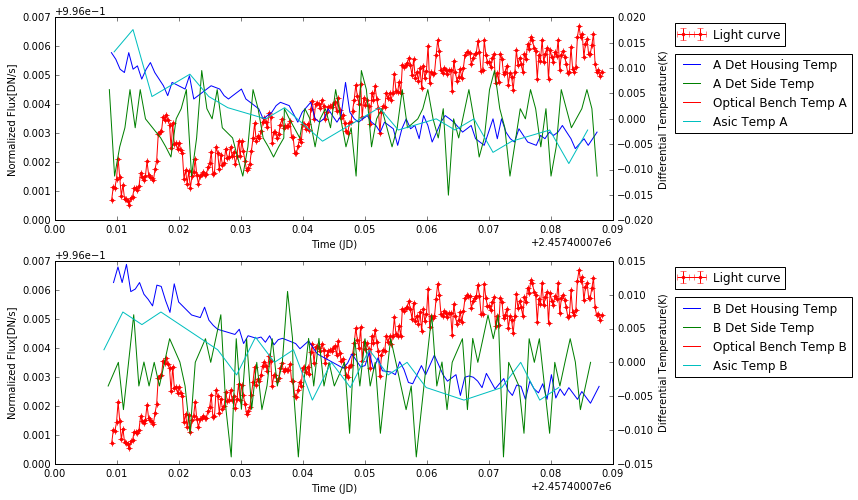

In [321]:
x = jd_time + stime
y = data1['a1_b4_res_flux']
#Light curve with A detector temperatures
plt.subplot(2,1,1)
rl.light_curve(x, y, 0, 0, 'r.-', 'Light curve')
plt.xlabel('Time (JD)')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.twinx()
for i in range(0,4):
    x1 = x_data[i][stime_ind[i]:etime_ind[i]]
    y1 = (y_data[i][stime_ind[i]:etime_ind[i]]).astype(np.float)
    offset = np.median(y1)
    plt.ylabel('Differential Temperature(K)')
    plt.plot(x1, y1 - offset, label = '%s' % description[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.85))
#Light curve with B detector temperatures
plt.subplot(2,1,2)
rl.light_curve(x, y, 0, 0, 'r.-', 'Light curve')
plt.xlabel('Time (JD)')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.twinx()
for i in range(4,8):
    x1 = x_data[i][stime_ind[i]:etime_ind[i]]
    y1 = (y_data[i][stime_ind[i]:etime_ind[i]]).astype(np.float)
    offset = np.median(y1)
    plt.ylabel('Differential Temperature(K)')
    plt.plot(x1, y1 - offset, label = '%s' % description[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.85))

## Test 2 (WLP8SUB640)

In [166]:
hdu_filenames_a12 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB640-6012195832_1_481_SE_2016-01-12T20h57m57/*.slp.fits')
len(hdu_filenames_a12)

60

In [167]:
hdu_filenames_b42 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB640-6012200140_1_489_SE_2016-01-12T20h58m27/*.slp.fits')
len(hdu_filenames_b42)

60

In [168]:
centers_a12 = rl.gen_center_g2d(326,320,5,400,2,2,0,hdu_filenames_a12)
centers_b42 = rl.gen_center_g2d(319,316,5,500,2,2,0,hdu_filenames_b42)
data2 = rl.average_residual_flux(centers_a12, centers_b42, 90, 100, 110, hdu_filenames_a12, hdu_filenames_b42)

In [323]:
hdu = fits.open(hdu_filenames_a12[1])
header = hdu[0].header
header

stime_str = header['DATE-OBS']+'T'+header['TIME-OBS']
etime_str = header['DATE-END']+'T'+header['TIME-END']
stime = Time(stime_str).jd
etime = Time(etime_str).jd
stime_ind = []
etime_ind = []
for i in range(0,8):
    if len(x_data[i]) != 0:
        stime_ind.append(closest_value(x_data[i], stime)[0])
        etime_ind.append(closest_value(x_data[i], etime)[0])
    else:
        stime_ind.append(0)
        etime_ind.append(0)
print stime, etime, stime_ind, etime_ind

2457400.33699 2457400.3573 [2197, 38260, 0, 700, 2027, 38741, 0, 719] [2221, 38282, 0, 706, 2050, 38766, 0, 725]


In [324]:
jd_time = data2['Time']/86400

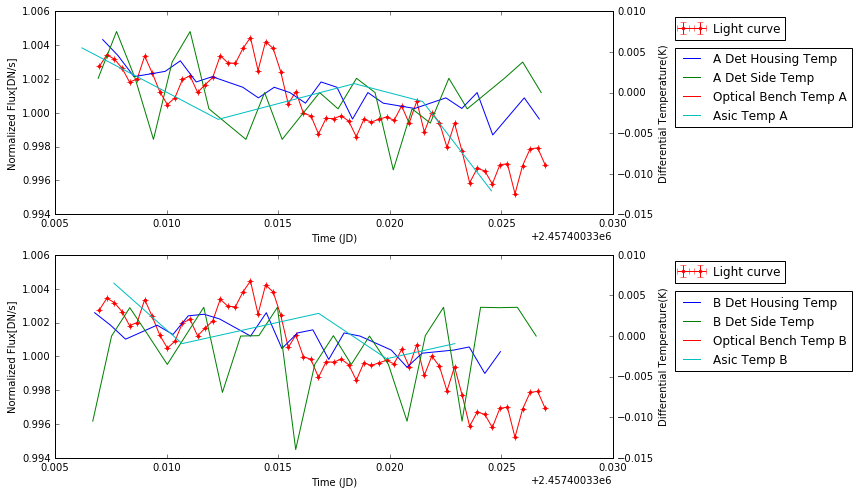

In [325]:
x = jd_time + stime
y = data2['a1_b4_res_flux']
#Light curve with A detector temperatures
plt.subplot(2,1,1)
rl.light_curve(x, y, 0, 0, 'r.-', 'Light curve')
plt.xlabel('Time (JD)')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.twinx()
for i in range(0,4):
    x1 = x_data[i][stime_ind[i]:etime_ind[i]]
    y1 = (y_data[i][stime_ind[i]:etime_ind[i]]).astype(np.float)
    offset = np.median(y1)
    plt.ylabel('Differential Temperature(K)')
    plt.plot(x1, y1 - offset, label = '%s' % description[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.85))
#Light curve with B detector temperatures
plt.subplot(2,1,2)
rl.light_curve(x, y, 0, 0, 'r.-', 'Light curve')
plt.xlabel('Time (JD)')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.twinx()
for i in range(4,8):
    x1 = x_data[i][stime_ind[i]:etime_ind[i]]
    y1 = (y_data[i][stime_ind[i]:etime_ind[i]]).astype(np.float)
    offset = np.median(y1)
    plt.ylabel('Differential Temperature(K)')
    plt.plot(x1, y1 - offset, label = '%s' % description[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.85))

## Test 3 (FULLQ)

In [172]:
hdu_filenames_a13 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8FULLQ-6013001651_1_481_SE_2016-01-13T01h03m43/*.red.fits')
len(hdu_filenames_a13)

55

In [173]:
hdu_filenames_b43 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8FULLQ-6013002009_1_489_SE_2016-01-13T01h03m23/*.red.fits')
len(hdu_filenames_b43)

55

In [174]:
centers_a13 = rl.gen_center_g2d(1405,1036,5,400,4,4,0,hdu_filenames_a13, red_files = True)
centers_b43 = rl.gen_center_g2d(828,821,5,600,4,4,0,hdu_filenames_b43, red_files = True)
data3 = rl.average_residual_flux(centers_a13, centers_b43, 60, 80, 90, 
                                 hdu_filenames_a13, hdu_filenames_b43, red_files = True)

In [326]:
hdu = fits.open(hdu_filenames_a13[1])
header = hdu[0].header
header

stime_str = header['DATE-OBS']+'T'+header['TIME-OBS']
etime_str = header['DATE-END']+'T'+header['TIME-END']
stime = Time(stime_str).jd
etime = Time(etime_str).jd
stime_ind = []
etime_ind = []
for i in range(0,8):
    if len(x_data[i]) != 0:
        stime_ind.append(closest_value(x_data[i], stime)[0])
        etime_ind.append(closest_value(x_data[i], etime)[0])
    else:
        stime_ind.append(0)
        etime_ind.append(0)
print stime, etime, stime_ind, etime_ind

2457400.51816 2457400.53866 [2421, 38733, 0, 756, 2226, 39224, 0, 765] [2446, 38756, 0, 759, 2246, 39245, 0, 772]


In [327]:
jd_time = data3['Time']/86400

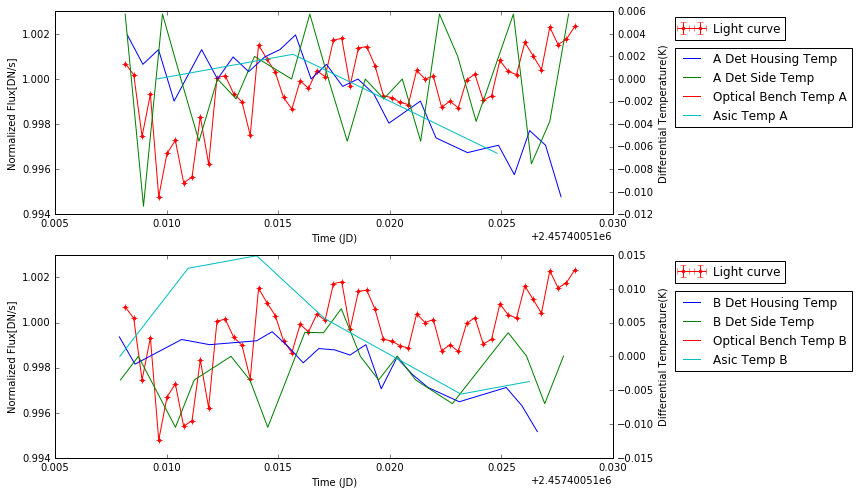

In [328]:
x = jd_time + stime
y = data3['a1_b4_res_flux']
#Light curve with A detector temperatures
plt.subplot(2,1,1)
rl.light_curve(x, y, 0, 0, 'r.-', 'Light curve')
plt.xlabel('Time (JD)')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.twinx()
for i in range(0,4):
    x1 = x_data[i][stime_ind[i]:etime_ind[i]]
    y1 = (y_data[i][stime_ind[i]:etime_ind[i]]).astype(np.float)
    offset = np.median(y1)
    plt.ylabel('Differential Temperature(K)')
    plt.plot(x1, y1 - offset, label = '%s' % description[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.85))
#Light curve with B detector temperatures
plt.subplot(2,1,2)
rl.light_curve(x, y, 0, 0, 'r.-', 'Light curve')
plt.xlabel('Time (JD)')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.twinx()
for i in range(4,8):
    x1 = x_data[i][stime_ind[i]:etime_ind[i]]
    y1 = (y_data[i][stime_ind[i]:etime_ind[i]]).astype(np.float)
    offset = np.median(y1)
    plt.ylabel('Differential Temperature(K)')
    plt.plot(x1, y1 - offset, label = '%s' % description[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.85))

## Test 4 (FULL1)

In [178]:
hdu_filenames_a14 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8FULL1-6012051326_1_481_SE_2016-01-12T08h55m24/*.red.fits')
len(hdu_filenames_a14)

225

In [179]:
hdu_filenames_b44 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8FULL1-6012051528_1_489_SE_2016-01-12T08h30m07/*.red.fits')
len(hdu_filenames_b44)

225

In [180]:
centers_a14 = rl.gen_center_g2d(1405,1036,5,400,4,4,0,hdu_filenames_a14, red_files = True)
centers_b44 = rl.gen_center_g2d(828,821,5,600,4,4,0,hdu_filenames_b44, red_files = True)
data4 = rl.average_residual_flux(centers_a14, centers_b44, 60, 80, 90, 
                                 hdu_filenames_a14, hdu_filenames_b44, red_files = True)

In [329]:
hdu = fits.open(hdu_filenames_a14[1])
header = hdu[0].header
header

stime_str = header['DATE-OBS']+'T'+header['TIME-OBS']
etime_str = header['DATE-END']+'T'+header['TIME-END']
stime = Time(stime_str).jd
etime = Time(etime_str).jd
stime_ind = []
etime_ind = []
for i in range(0,8):
    if len(x_data[i]) != 0:
        stime_ind.append(closest_value(x_data[i], stime)[0])
        etime_ind.append(closest_value(x_data[i], etime)[0])
    else:
        stime_ind.append(0)
        etime_ind.append(0)
print stime, etime, stime_ind, etime_ind

2457399.72066 2457399.80454 [1472, 36275, 0, 540, 1342, 36780, 0, 548] [1571, 36364, 0, 557, 1435, 36861, 0, 569]


In [330]:
jd_time = data4['Time']/86400

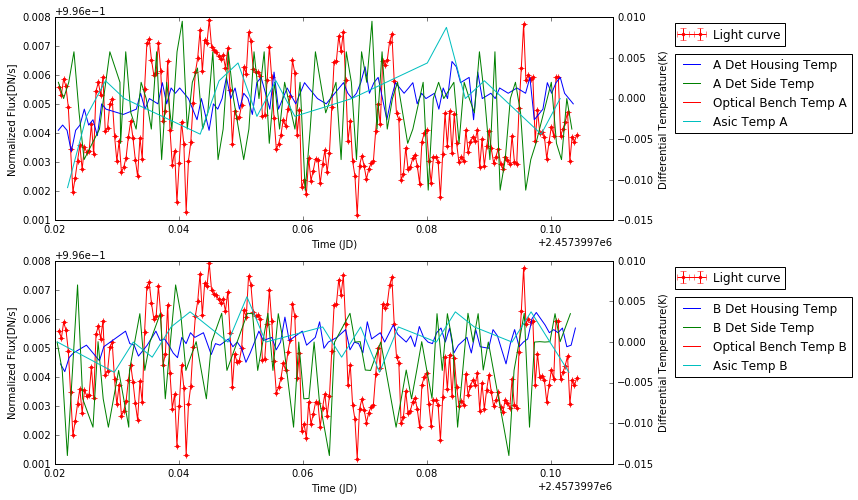

In [331]:
x = jd_time + stime
y = data4['a1_b4_res_flux']
#Light curve with A detector temperatures
plt.subplot(2,1,1)
rl.light_curve(x, y, 0, 0, 'r.-', 'Light curve')
plt.xlabel('Time (JD)')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.twinx()
for i in range(0,4):
    x1 = x_data[i][stime_ind[i]:etime_ind[i]]
    y1 = (y_data[i][stime_ind[i]:etime_ind[i]]).astype(np.float)
    offset = np.median(y1)
    plt.ylabel('Differential Temperature(K)')
    plt.plot(x1, y1 - offset, label = '%s' % description[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.85))
#Light curve with B detector temperatures
plt.subplot(2,1,2)
rl.light_curve(x, y, 0, 0, 'r.-', 'Light curve')
plt.xlabel('Time (JD)')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.twinx()
for i in range(4,8):
    x1 = x_data[i][stime_ind[i]:etime_ind[i]]
    y1 = (y_data[i][stime_ind[i]:etime_ind[i]]).astype(np.float)
    offset = np.median(y1)
    plt.ylabel('Differential Temperature(K)')
    plt.plot(x1, y1 - offset, label = '%s' % description[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.85))

## Test 5 (FULL2)

In [184]:
hdu_filenames_a15 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8FULL2-6012072417_1_481_SE_2016-01-12T10h40m58/*.red.fits')
len(hdu_filenames_a15)

225

In [185]:
hdu_filenames_b45 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8FULL2-6012072532_1_489_SE_2016-01-12T11h09m06/*.red.fits')
len(hdu_filenames_b45)

225

In [186]:
centers_a15 = rl.gen_center_g2d(1405,1036,5,400,4,4,0,hdu_filenames_a15, red_files = True)
centers_b45 = rl.gen_center_g2d(828,821,5,600,4,4,0,hdu_filenames_b45, red_files = True)
data5 = rl.average_residual_flux(centers_a15, centers_b45, 60, 80, 90, 
                                 hdu_filenames_a15, hdu_filenames_b45, red_files = True)

In [332]:
hdu = fits.open(hdu_filenames_a15[1])
header = hdu[0].header
header

stime_str = header['DATE-OBS']+'T'+header['TIME-OBS']
etime_str = header['DATE-END']+'T'+header['TIME-END']
stime = Time(stime_str).jd
etime = Time(etime_str).jd
stime_ind = []
etime_ind = []
for i in range(0,8):
    if len(x_data[i]) != 0:
        stime_ind.append(closest_value(x_data[i], stime)[0])
        etime_ind.append(closest_value(x_data[i], etime)[0])
    else:
        stime_ind.append(0)
        etime_ind.append(0)
print stime, etime, stime_ind, etime_ind

2457399.81038 2457399.89426 [1578, 36389, 0, 560, 1442, 36886, 0, 570] [1672, 36475, 0, 579, 1539, 36973, 0, 593]


In [333]:
jd_time = data5['Time']/86400

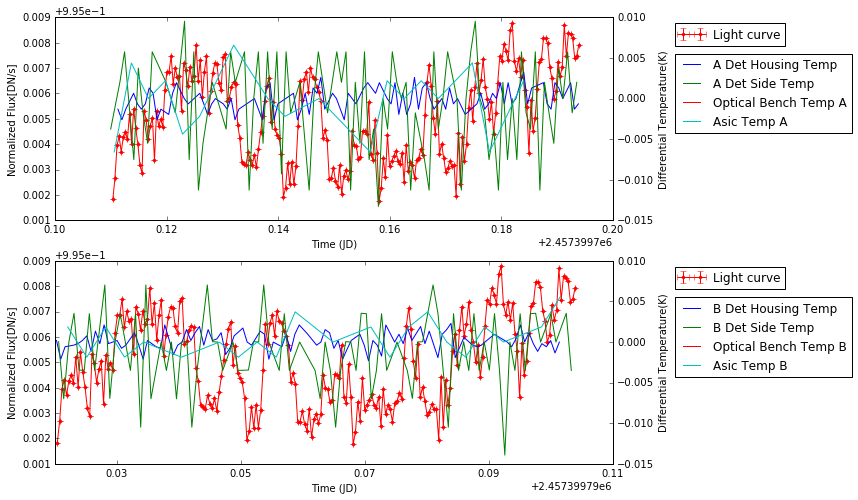

In [334]:
x = jd_time + stime
y = data5['a1_b4_res_flux']
#Light curve with A detector temperatures
plt.subplot(2,1,1)
rl.light_curve(x, y, 0, 0, 'r.-', 'Light curve')
plt.xlabel('Time (JD)')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.twinx()
for i in range(0,4):
    x1 = x_data[i][stime_ind[i]:etime_ind[i]]
    y1 = (y_data[i][stime_ind[i]:etime_ind[i]]).astype(np.float)
    offset = np.median(y1)
    plt.ylabel('Differential Temperature(K)')
    plt.plot(x1, y1 - offset, label = '%s' % description[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.85))
#Light curve with B detector temperatures
plt.subplot(2,1,2)
rl.light_curve(x, y, 0, 0, 'r.-', 'Light curve')
plt.xlabel('Time (JD)')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.twinx()
for i in range(4,8):
    x1 = x_data[i][stime_ind[i]:etime_ind[i]]
    y1 = (y_data[i][stime_ind[i]:etime_ind[i]]).astype(np.float)
    offset = np.median(y1)
    plt.ylabel('Differential Temperature(K)')
    plt.plot(x1, y1 - offset, label = '%s' % description[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.85))

## Test 6 (FULL3)

In [190]:
hdu_filenames_a16 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8FULL3-6012093326_1_481_SE_2016-01-12T12h47m44/*.red.fits')
len(hdu_filenames_a16)

225

In [191]:
hdu_filenames_b46 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8FULL3-6012093432_1_489_SE_2016-01-12T12h52m21/*.red.fits')
len(hdu_filenames_b46)

225

In [192]:
centers_a16 = rl.gen_center_g2d(1405,1036,5,400,4,4,0,hdu_filenames_a16, red_files = True)
centers_b46 = rl.gen_center_g2d(828,821,5,600,4,4,0,hdu_filenames_b46, red_files = True)
data6 = rl.average_residual_flux(centers_a16, centers_b46, 60, 80, 90, 
                                 hdu_filenames_a16, hdu_filenames_b46, red_files = True)

In [335]:
hdu = fits.open(hdu_filenames_a16[1])
header = hdu[0].header
header

stime_str = header['DATE-OBS']+'T'+header['TIME-OBS']
etime_str = header['DATE-END']+'T'+header['TIME-END']
stime = Time(stime_str).jd
etime = Time(etime_str).jd
stime_ind = []
etime_ind = []
for i in range(0,8):
    if len(x_data[i]) != 0:
        stime_ind.append(closest_value(x_data[i], stime)[0])
        etime_ind.append(closest_value(x_data[i], etime)[0])
    else:
        stime_ind.append(0)
        etime_ind.append(0)
print stime, etime, stime_ind, etime_ind

2457399.9001 2457399.98398 [1676, 36499, 0, 581, 1547, 36997, 0, 595] [1773, 36590, 0, 603, 1636, 37080, 0, 616]


In [336]:
jd_time = data6['Time']/86400

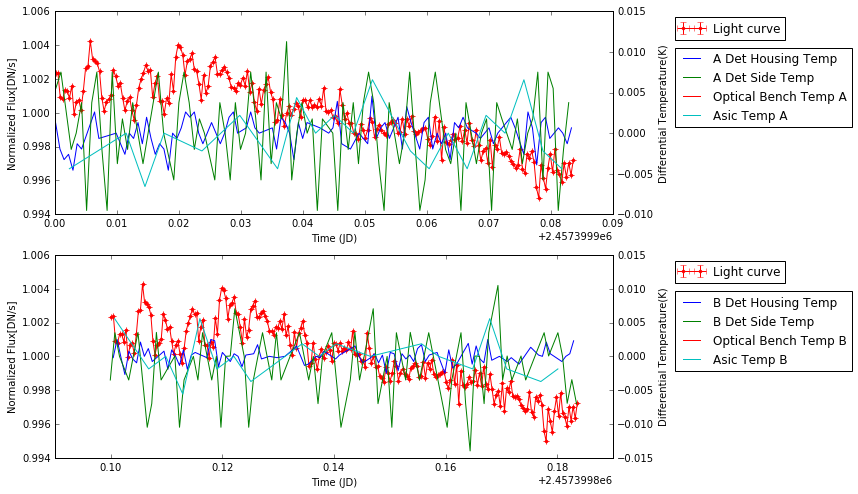

In [337]:
x = jd_time + stime
y = data6['a1_b4_res_flux']
#Light curve with A detector temperatures
plt.subplot(2,1,1)
rl.light_curve(x, y, 0, 0, 'r.-', 'Light curve')
plt.xlabel('Time (JD)')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.twinx()
for i in range(0,4):
    x1 = x_data[i][stime_ind[i]:etime_ind[i]]
    y1 = (y_data[i][stime_ind[i]:etime_ind[i]]).astype(np.float)
    offset = np.median(y1)
    plt.ylabel('Differential Temperature(K)')
    plt.plot(x1, y1 - offset, label = '%s' % description[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.85))
#Light curve with B detector temperatures
plt.subplot(2,1,2)
rl.light_curve(x, y, 0, 0, 'r.-', 'Light curve')
plt.xlabel('Time (JD)')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.twinx()
for i in range(4,8):
    x1 = x_data[i][stime_ind[i]:etime_ind[i]]
    y1 = (y_data[i][stime_ind[i]:etime_ind[i]]).astype(np.float)
    offset = np.median(y1)
    plt.ylabel('Differential Temperature(K)')
    plt.plot(x1, y1 - offset, label = '%s' % description[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.85))

## Test 7 (FULL4)

In [196]:
hdu_filenames_a17 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8FULL4-6012114105_1_481_SE_2016-01-12T14h25m53/*.red.fits')
len(hdu_filenames_a17)

225

In [197]:
hdu_filenames_b47 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8FULL4-6012114212_1_489_SE_2016-01-12T14h58m10/*.red.fits')
len(hdu_filenames_b47)

225

In [198]:
centers_a17 = rl.gen_center_g2d(1405,1036,5,400,4,4,0,hdu_filenames_a17, red_files = True)
centers_b47 = rl.gen_center_g2d(828,821,5,600,4,4,0,hdu_filenames_b47, red_files = True)
data7 = rl.average_residual_flux(centers_a17, centers_b47, 60, 80, 90, 
                                 hdu_filenames_a17, hdu_filenames_b47, red_files = True)

In [338]:
hdu = fits.open(hdu_filenames_a17[1])
header = hdu[0].header
header

stime_str = header['DATE-OBS']+'T'+header['TIME-OBS']
etime_str = header['DATE-END']+'T'+header['TIME-END']
stime = Time(stime_str).jd
etime = Time(etime_str).jd
stime_ind = []
etime_ind = []
for i in range(0,8):
    if len(x_data[i]) != 0:
        stime_ind.append(closest_value(x_data[i], stime)[0])
        etime_ind.append(closest_value(x_data[i], etime)[0])
    else:
        stime_ind.append(0)
        etime_ind.append(0)
print stime, etime, stime_ind, etime_ind

2457399.98871 2457400.07259 [1779, 36619, 0, 604, 1641, 37103, 0, 618] [1878, 36707, 0, 626, 1734, 37195, 0, 642]


In [339]:
jd_time = data7['Time']/86400

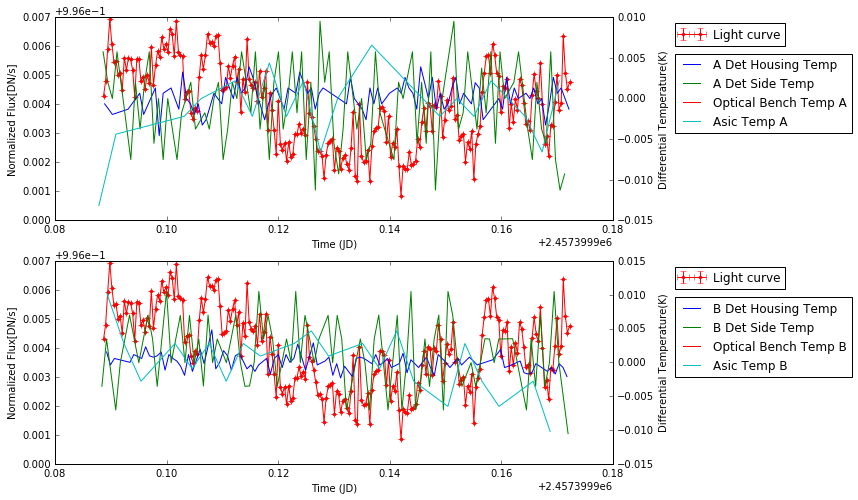

In [340]:
x = jd_time + stime
y = data7['a1_b4_res_flux']
#Light curve with A detector temperatures
plt.subplot(2,1,1)
rl.light_curve(x, y, 0, 0, 'r.-', 'Light curve')
plt.xlabel('Time (JD)')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.twinx()
for i in range(0,4):
    x1 = x_data[i][stime_ind[i]:etime_ind[i]]
    y1 = (y_data[i][stime_ind[i]:etime_ind[i]]).astype(np.float)
    offset = np.median(y1)
    plt.ylabel('Differential Temperature(K)')
    plt.plot(x1, y1 - offset, label = '%s' % description[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.85))
#Light curve with B detector temperatures
plt.subplot(2,1,2)
rl.light_curve(x, y, 0, 0, 'r.-', 'Light curve')
plt.xlabel('Time (JD)')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.twinx()
for i in range(4,8):
    x1 = x_data[i][stime_ind[i]:etime_ind[i]]
    y1 = (y_data[i][stime_ind[i]:etime_ind[i]]).astype(np.float)
    offset = np.median(y1)
    plt.ylabel('Differential Temperature(K)')
    plt.plot(x1, y1 - offset, label = '%s' % description[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.85))

## Test 8 (FULL5)

In [202]:
hdu_filenames_a18 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8FULL5-6012184421_1_481_SE_2016-01-12T20h26m57/*.red.fits')
len(hdu_filenames_a18)

110

In [203]:
hdu_filenames_b48 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8FULL5-6012185018_1_489_SE_2016-01-12T20h20m15/*.red.fits')
len(hdu_filenames_b48)

110

In [204]:
centers_a18 = rl.gen_center_g2d(1405,1036,5,400,4,4,0,hdu_filenames_a18, red_files = True)
centers_b48 = rl.gen_center_g2d(828,821,5,600,4,4,0,hdu_filenames_b48, red_files = True)
data8 = rl.average_residual_flux(centers_a18, centers_b48, 60, 80, 90, 
                                 hdu_filenames_a18, hdu_filenames_b48, red_files = True)

In [341]:
hdu = fits.open(hdu_filenames_a18[1])
header = hdu[0].header
header

stime_str = header['DATE-OBS']+'T'+header['TIME-OBS']
etime_str = header['DATE-END']+'T'+header['TIME-END']
stime = Time(stime_str).jd
etime = Time(etime_str).jd
stime_ind = []
etime_ind = []
for i in range(0,8):
    if len(x_data[i]) != 0:
        stime_ind.append(closest_value(x_data[i], stime)[0])
        etime_ind.append(closest_value(x_data[i], etime)[0])
    else:
        stime_ind.append(0)
        etime_ind.append(0)
print stime, etime, stime_ind, etime_ind

2457400.28738 2457400.32839 [2139, 38184, 0, 685, 1968, 38668, 0, 705] [2187, 38226, 0, 697, 2017, 38711, 0, 716]


In [342]:
jd_time = data8['Time']/86400

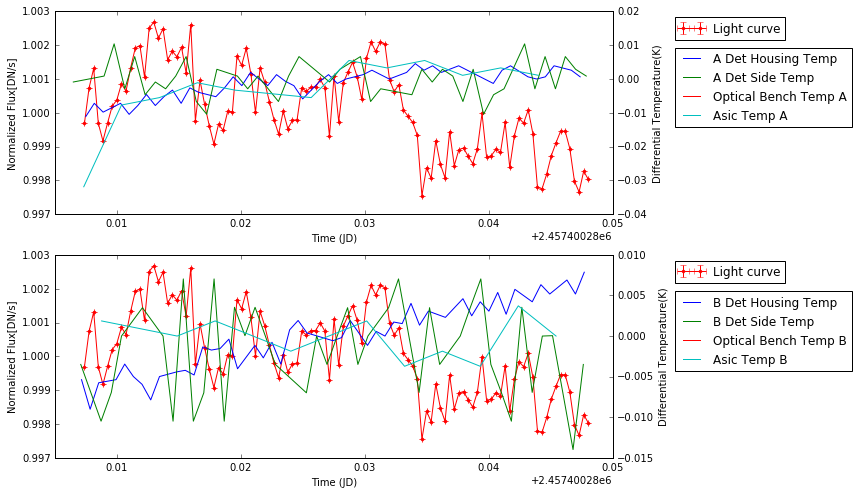

In [343]:
x = jd_time + stime
y = data8['a1_b4_res_flux']
#Light curve with A detector temperatures
plt.subplot(2,1,1)
rl.light_curve(x, y, 0, 0, 'r.-', 'Light curve')
plt.xlabel('Time (JD)')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.twinx()
for i in range(0,4):
    x1 = x_data[i][stime_ind[i]:etime_ind[i]]
    y1 = (y_data[i][stime_ind[i]:etime_ind[i]]).astype(np.float)
    offset = np.median(y1)
    plt.ylabel('Differential Temperature(K)')
    plt.plot(x1, y1 - offset, label = '%s' % description[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.85))
#Light curve with B detector temperatures
plt.subplot(2,1,2)
rl.light_curve(x, y, 0, 0, 'r.-', 'Light curve')
plt.xlabel('Time (JD)')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.twinx()
for i in range(4,8):
    x1 = x_data[i][stime_ind[i]:etime_ind[i]]
    y1 = (y_data[i][stime_ind[i]:etime_ind[i]]).astype(np.float)
    offset = np.median(y1)
    plt.ylabel('Differential Temperature(K)')
    plt.plot(x1, y1 - offset, label = '%s' % description[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.85))